## Data analysis

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df_mk1        = pd.read_csv("clean_data/clean_data_mk1_i5pyilec.csv")
df_mk2        = pd.read_csv("clean_data/clean_data_mk2_dzoz67y9.csv")
df_mk3        = pd.read_csv("clean_data/clean_data_mk3_mklqs5l0.csv")
df_mk4        = pd.read_csv("clean_data/clean_data_mk4_080ps8pg.csv")
combined_data = pd.read_csv("clean_data/combined_data/combined_data.csv")

In [4]:
#Exclude participants
combined_data = combined_data.loc[combined_data["prolific_id"] != "I am the experimenter."] #exclude us, i.e. player 4 in first pilot
combined_data = combined_data.loc[combined_data["participant_code"] != "j89thiah"] #exclude woman with baby in session 1, i.e. player 5 in first pilot.
combined_data = combined_data.loc[combined_data["participant_code"] != "97ajc1w1"] #exclude p4 in session Mklqs5l0, was inactive during entire thing except for round 1 (dropout)- 

#Create unique players
combined_data["player_nb"] = combined_data["player"]
combined_data["player"] = combined_data["player"].astype(str)
combined_data["player"] = combined_data["player"] + combined_data["participant_code"]

#combine session code with mastok session
combined_data['mk_session'] = combined_data['mk_session'].replace('mk:Ultimatum_Game_Real:', 'mk_', regex=True)
combined_data['mk_session'] = combined_data['mk_session'] + "_" + combined_data['session_code']

#Create a new column for manip of other player in each dyad. 
combined_data["other_manipulation"] = np.where(combined_data["manipulation"] == "dominant", "submissive", "dominant")
#Create a new column categorizing sent offers as either fair or unfair. 1 = fair, 0 = unfair
combined_data["fair_offer"]         = np.where(combined_data["sent_amount"] >=5, 1, 0)

## Acceptance rate of offers

0.9491094147582697
0.821882951653944
fair_offer
0    0.742857
1    0.993808
Name: offer_response, dtype: float64
other_manipulation
dominant      0.949239
submissive    0.948980
Name: offer_response, dtype: float64
mk_session
mk_1_i5pyilec    0.973684
mk_2_dzoz67y9    0.879310
mk_3_mklqs5l0    1.000000
mk_4_080ps8pg    0.966667
Name: offer_response, dtype: float64


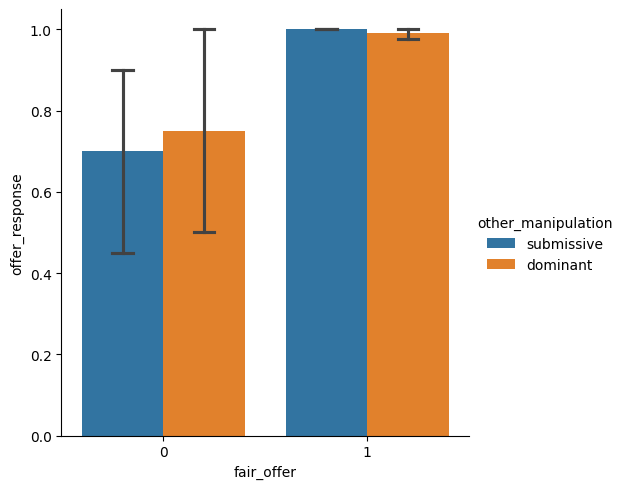

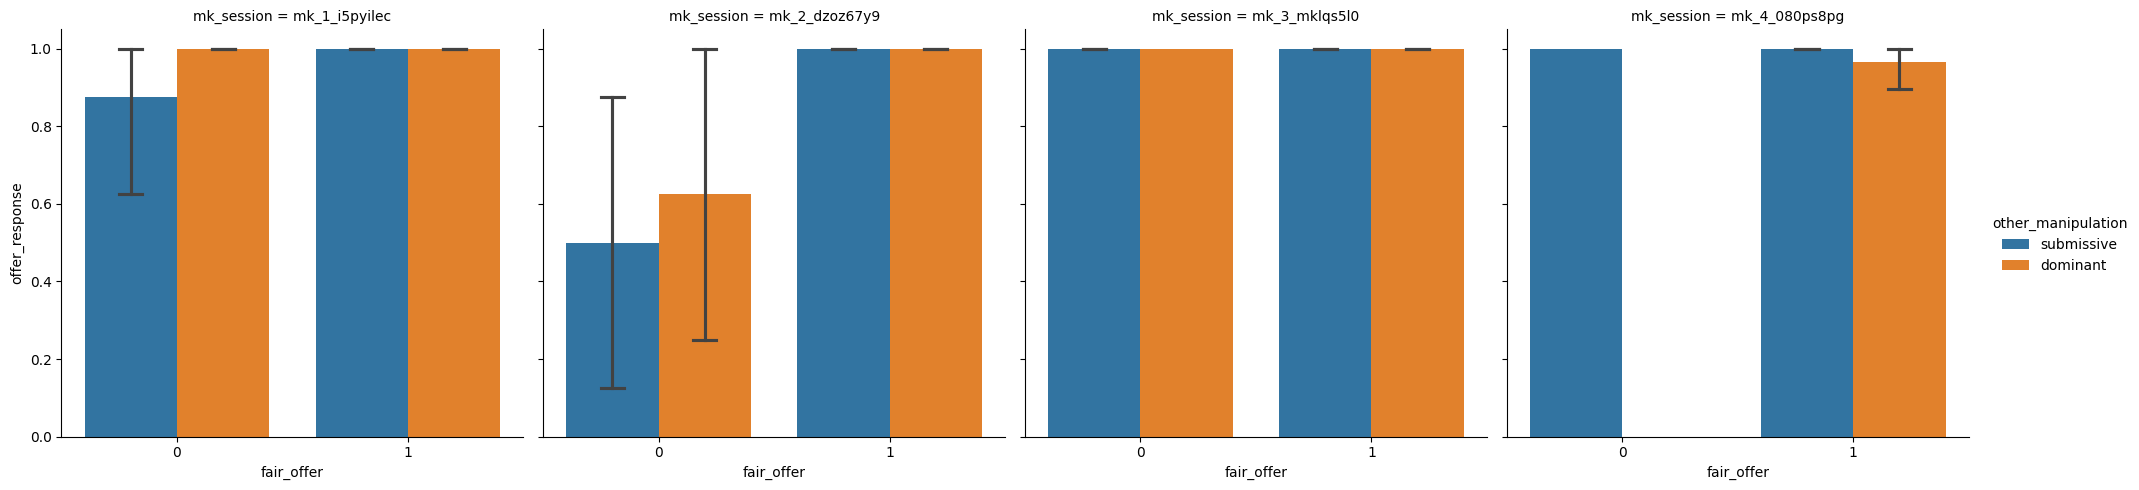

In [5]:
#exclude nans
df_responded = combined_data[combined_data['offer_response'].notna()]
print(df_responded["offer_response"].mean()) #94.9 of offers are accepted. 
print(df_responded["fair_offer"].mean()) #81.9% of offers are fair. 


print(df_responded.groupby("fair_offer")['offer_response'].mean())
#   fair_offer        mean
#       0           0.742857
#       1           0.993808


print(df_responded.groupby(["other_manipulation"])['offer_response'].mean())

#    other_manipulation       mean
#     dominant               0.949239
#    submissive              0.948980


print(df_responded.groupby(["mk_session"])['offer_response'].mean())

#     mk_session        mean
#    mk_1_i5pyilec    0.973684
#    mk_2_dzoz67y9    0.879310
#    mk_3_mklqs5l0    1.000000
#    mk_4_080ps8pg    0.966667


df_responded_resp = df_responded.loc[df_responded["role"] == "responder"]
df_analysis = df_responded_resp.groupby(["player", "fair_offer", "other_manipulation"])['offer_response'].mean().reset_index()

sns.catplot(x = "fair_offer", y = "offer_response", hue="other_manipulation", data=df_analysis, kind="bar", capsize=.2)

sns.catplot(x = "fair_offer", y = "offer_response", hue="other_manipulation", data=df_responded_resp,col="mk_session", kind="bar", capsize=.2)


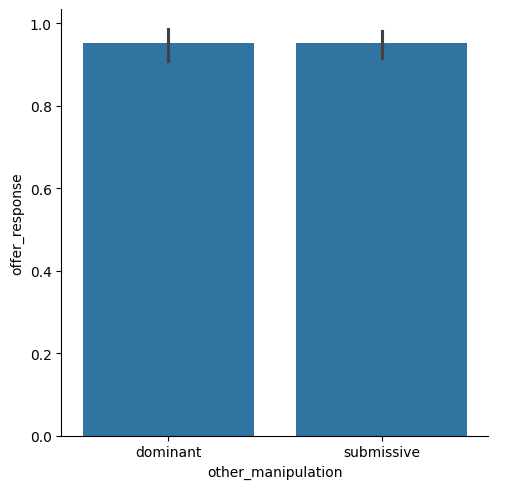

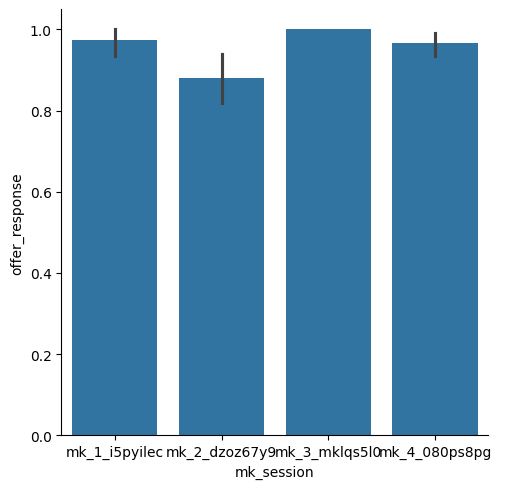

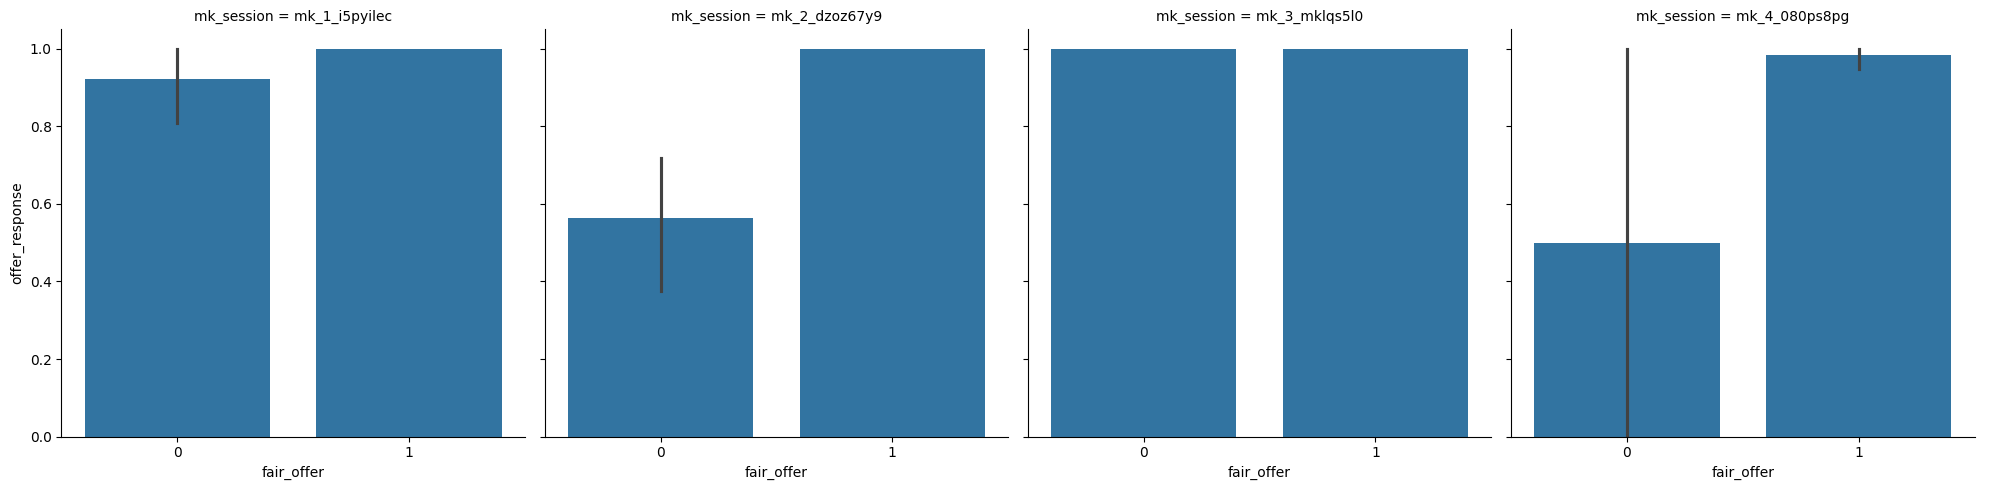

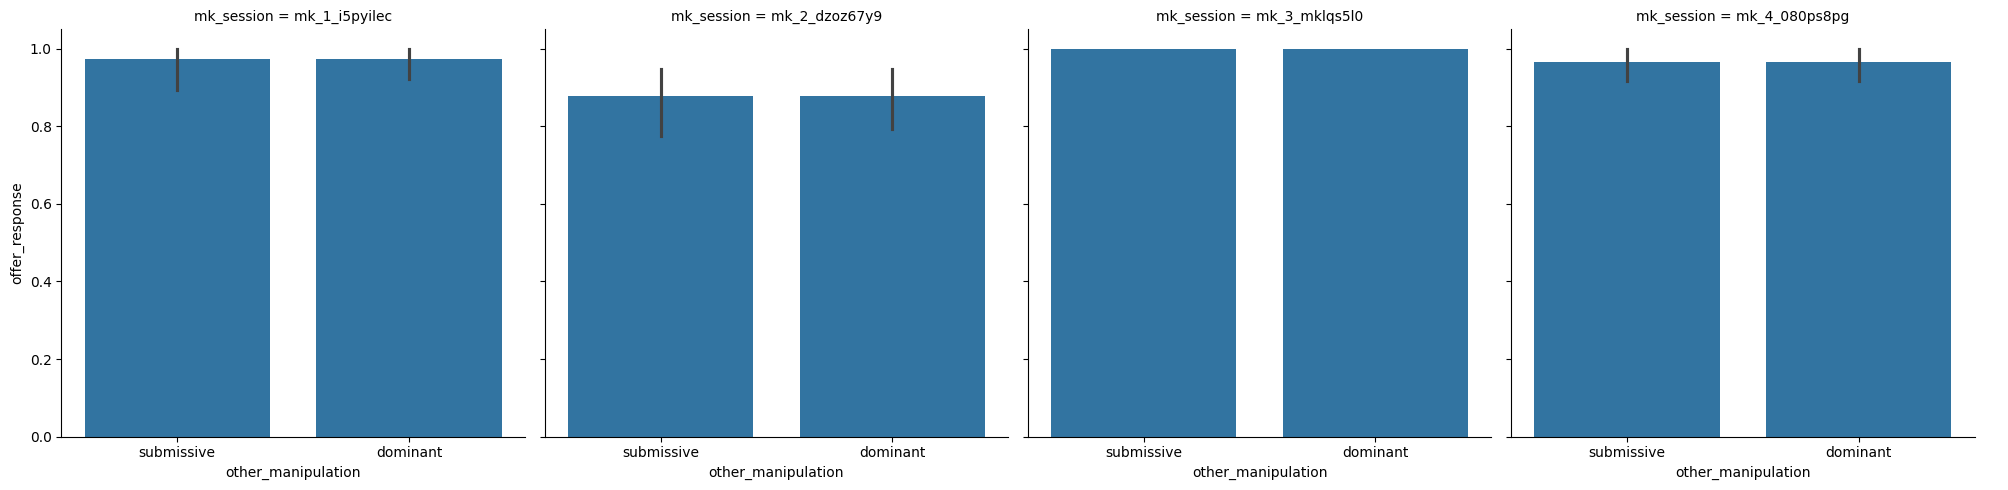

In [6]:
#SOME PLOTS

df_analysis = df_responded.groupby(["other_manipulation","player"])['offer_response'].mean().reset_index()
sns.catplot(x = "other_manipulation", y = "offer_response", kind = "bar", data = df_analysis)

sns.catplot(x = "mk_session", y = "offer_response", kind = "bar", data = df_responded)

#fair_mk = combined_data.groupby(["mk_session", "fair_offer"])['offer_response'].mean().reset_index()
sns.catplot(x = "fair_offer", y = "offer_response", col = "mk_session", kind = "bar", data = df_responded)

sns.catplot(x = "other_manipulation", y = "offer_response", kind = "bar", col = "mk_session", data = df_responded)

In [7]:
df_responded_accepted = df_responded[df_responded["sent_amount"] < 5]

## Trial Payoff

4.748091603053435
manipulation
dominant      4.790816
submissive    4.705584
Name: trial_payoff, dtype: float64


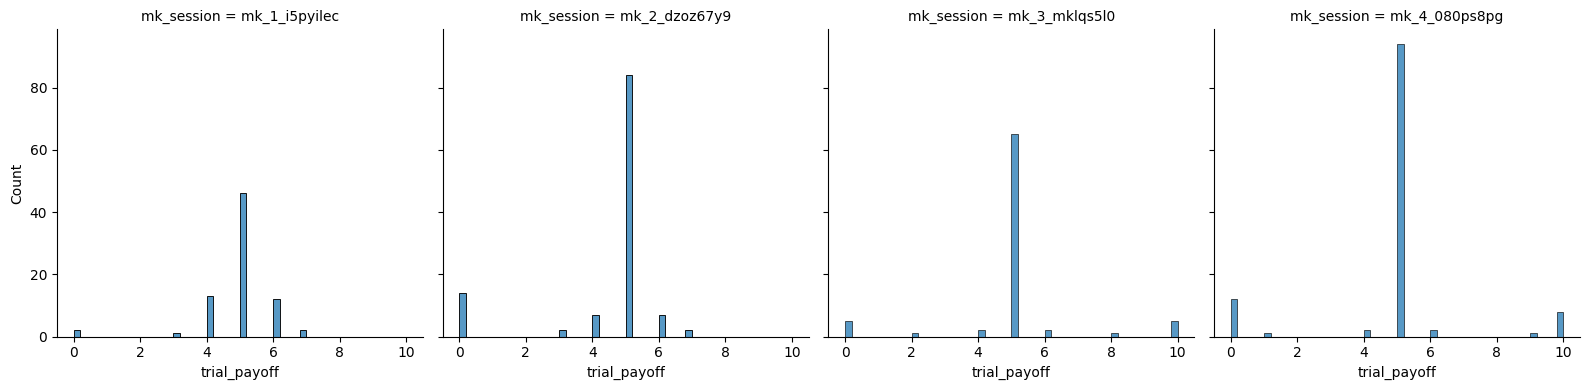

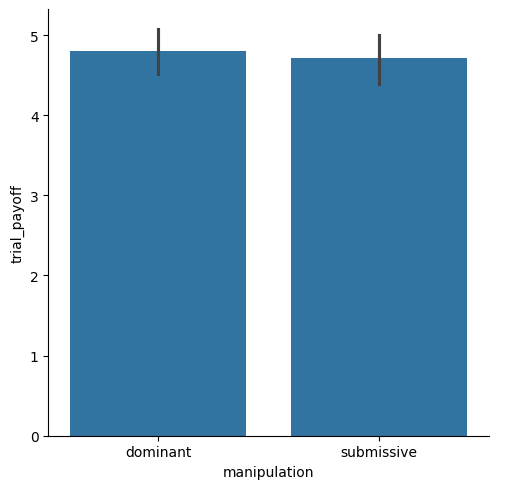

In [8]:
print(df_responded["trial_payoff"].mean()) #4.61
print(df_responded.groupby(["manipulation"])['trial_payoff'].mean())
#   manipulation       mean
#   dominant        4.648
#   submissive      4.589

#check distrubtion of trial_payoff across sessions

g = sns.FacetGrid(df_responded, col="mk_session", col_wrap=4, height=4)
g.map(sns.histplot, "trial_payoff", binwidth=.2)
#Plot trial_payoff for dominant and submissive. 
df_analysis = df_responded.groupby(["manipulation", "player"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "manipulation", y = "trial_payoff", data = df_analysis, kind = "bar")

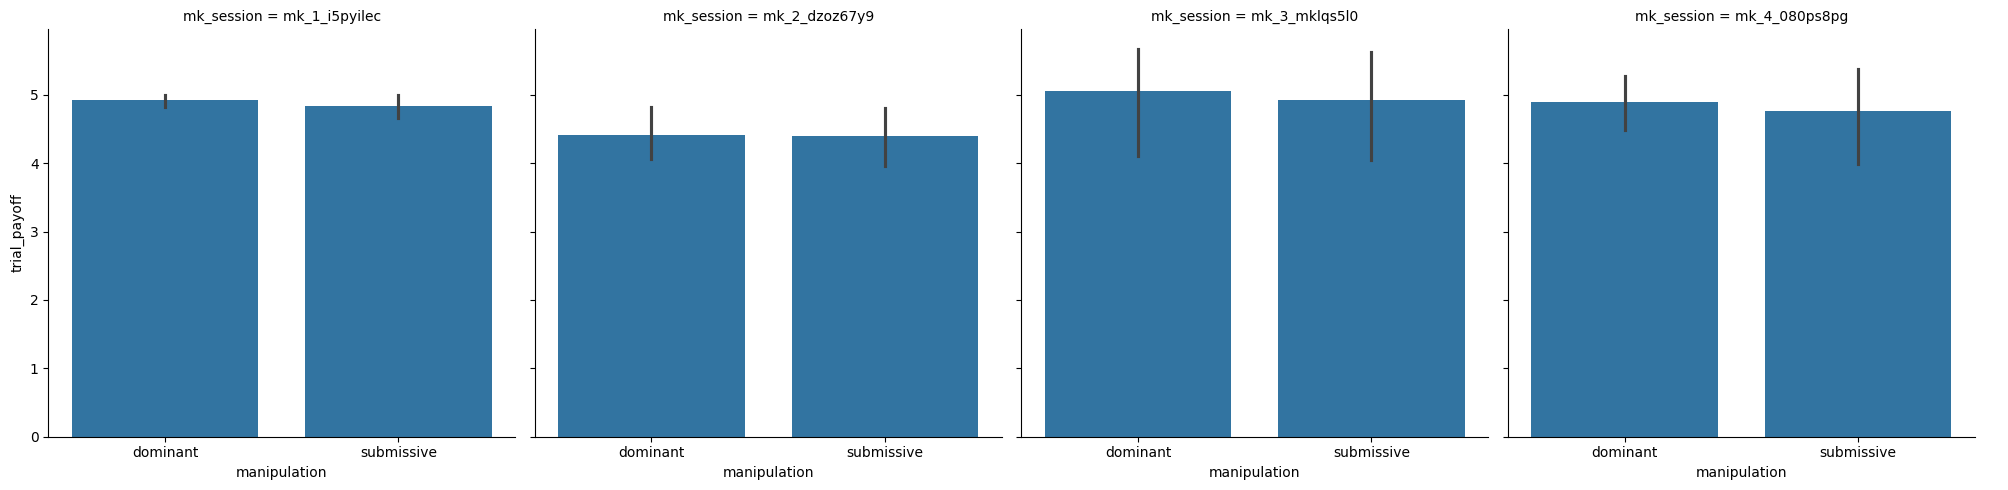

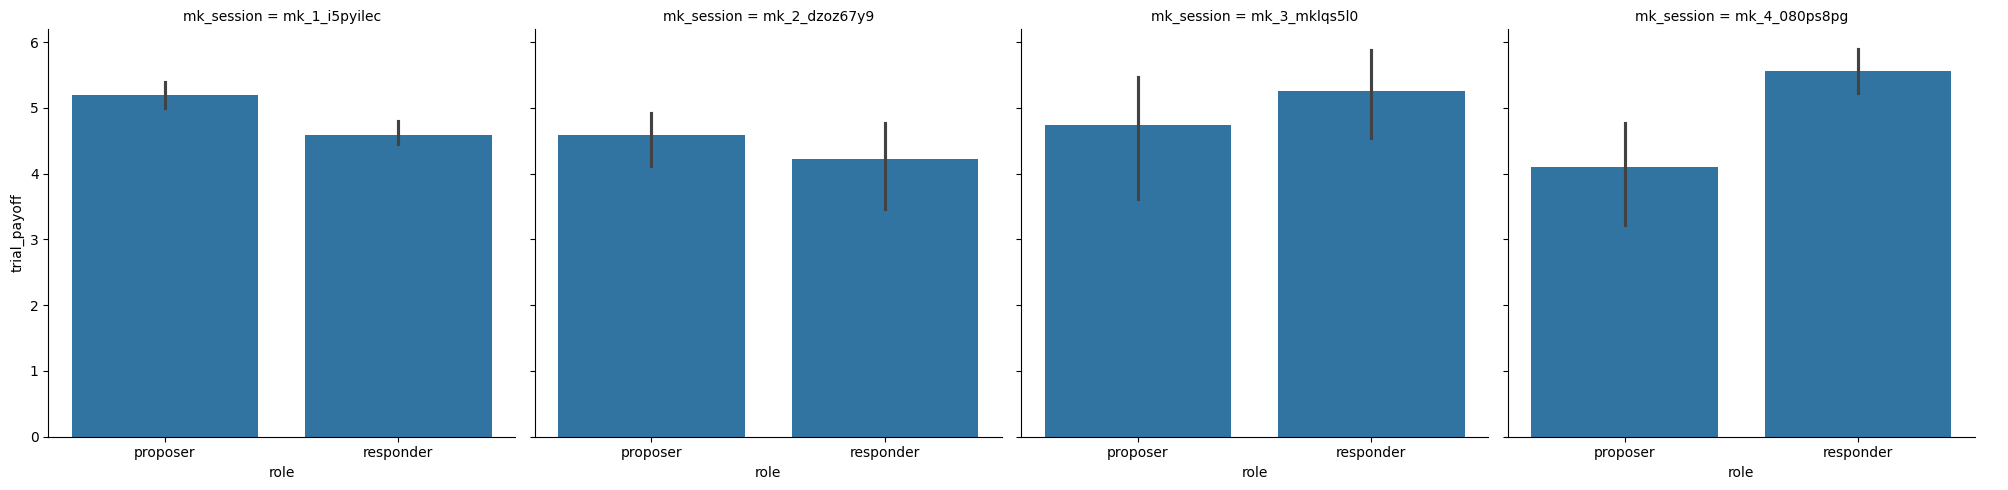

In [9]:
df_mk1 = df_responded.loc[df_responded["mk_session"] == "mk_1_i5pyilec"] 
df_mk2 = df_responded.loc[df_responded["mk_session"] == "mk_2_dzoz67y9"] 
df_mk3 = df_responded.loc[df_responded["mk_session"] == "mk_3_mklqs5l0"] 
df_mk4 = df_responded.loc[df_responded["mk_session"] == "mk_4_080ps8pg"] 


df_analysis_mk1 = df_mk1.groupby(["player","manipulation"])['trial_payoff'].mean().reset_index()
df_analysis_mk1["mk_session"] = "mk_1_i5pyilec"

df_analysis_mk2 = df_mk2.groupby(["player","manipulation"])['trial_payoff'].mean().reset_index()
df_analysis_mk2["mk_session"] = "mk_2_dzoz67y9"

df_analysis_mk3 = df_mk3.groupby(["player","manipulation"])['trial_payoff'].mean().reset_index()
df_analysis_mk3["mk_session"] = "mk_3_mklqs5l0"

df_analysis_mk4 = df_mk4.groupby(["player","manipulation"])['trial_payoff'].mean().reset_index()
df_analysis_mk4["mk_session"] = "mk_4_080ps8pg"

df_analysis_combined = pd.concat([df_analysis_mk1, df_analysis_mk2, df_analysis_mk3, df_analysis_mk4], ignore_index=True)

#The same plot grouped by session
sns.catplot(x = "manipulation", y = "trial_payoff", data = df_analysis_combined, kind = "bar", col = "mk_session")


df_analysis_mk1 = df_mk1.groupby(["player","role"])['trial_payoff'].mean().reset_index()
df_analysis_mk1["mk_session"] = "mk_1_i5pyilec"

df_analysis_mk2 = df_mk2.groupby(["player","role"])['trial_payoff'].mean().reset_index()
df_analysis_mk2["mk_session"] = "mk_2_dzoz67y9"

df_analysis_mk3 = df_mk3.groupby(["player","role"])['trial_payoff'].mean().reset_index()
df_analysis_mk3["mk_session"] = "mk_3_mklqs5l0"

df_analysis_mk4 = df_mk4.groupby(["player","role"])['trial_payoff'].mean().reset_index()
df_analysis_mk4["mk_session"] = "mk_4_080ps8pg"

df_analysis_combined = pd.concat([df_analysis_mk1, df_analysis_mk2, df_analysis_mk3, df_analysis_mk4], ignore_index=True)
sns.catplot(x = "role", y = "trial_payoff", data = df_analysis_combined, kind = "bar", col = "mk_session")



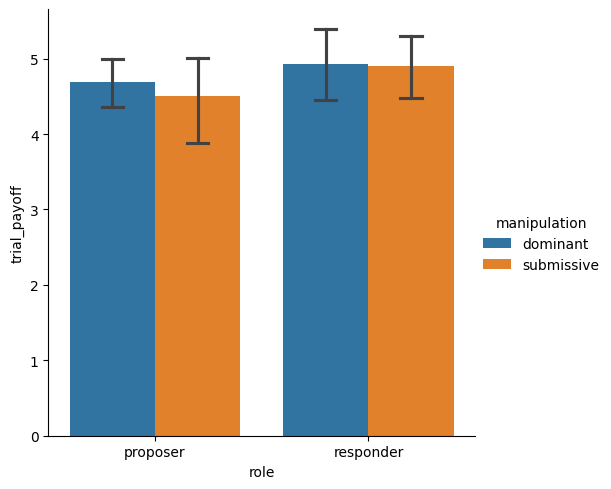

In [10]:

#ALL DATA, grouped according to player, manip and role.
df_analysis = df_responded.groupby(["player","role","manipulation"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", kind = "bar", data = df_analysis, dodge= True, capsize = .2)

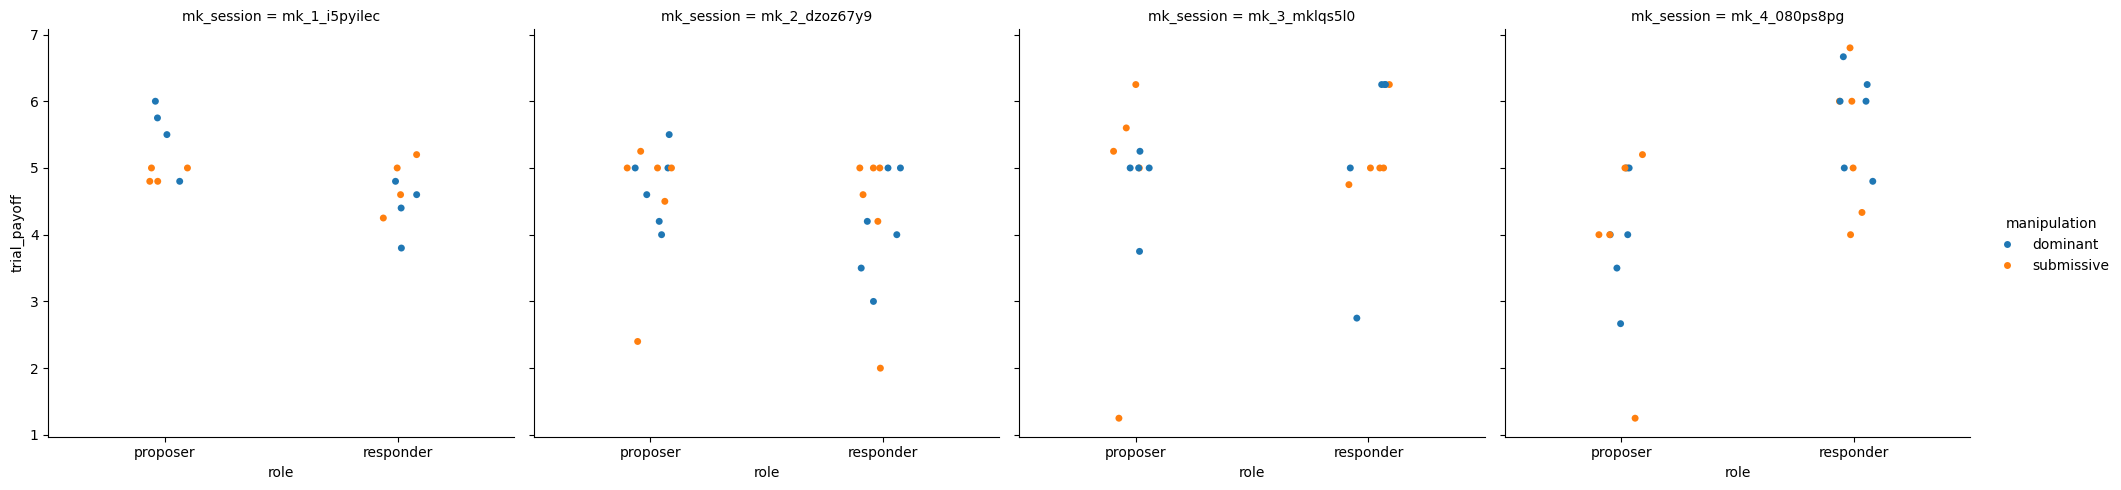

In [12]:

df_analysis_mk1 = df_mk1.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
df_analysis_mk1["mk_session"] = "mk_1_i5pyilec"

df_analysis_mk2 = df_mk2.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
df_analysis_mk2["mk_session"] = "mk_2_dzoz67y9"

df_analysis_mk3 = df_mk3.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
df_analysis_mk3["mk_session"] = "mk_3_mklqs5l0"

df_analysis_mk4 = df_mk4.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
df_analysis_mk4["mk_session"] = "mk_4_080ps8pg"

df_analysis_combined = pd.concat([df_analysis_mk1, df_analysis_mk2, df_analysis_mk3, df_analysis_mk4], ignore_index=True)

sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", col = "mk_session", data = df_analysis_combined)


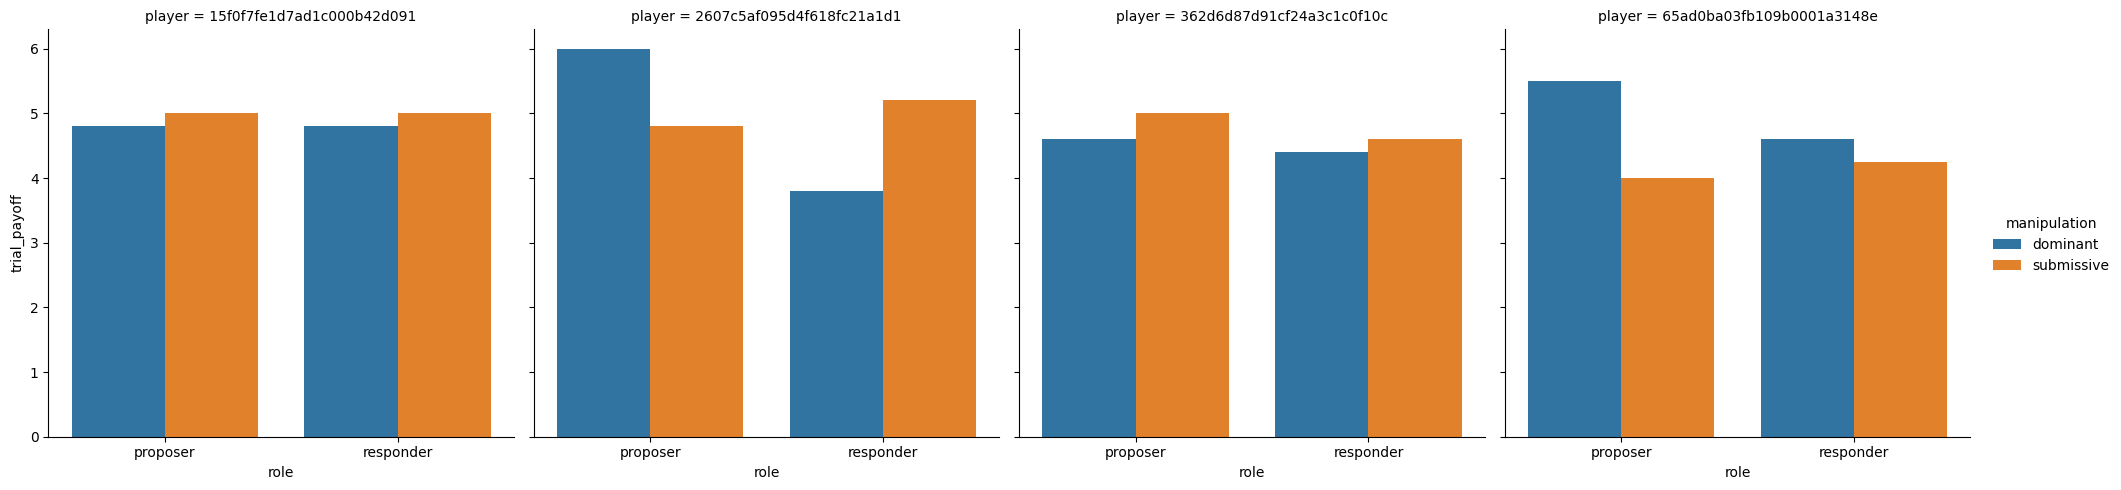

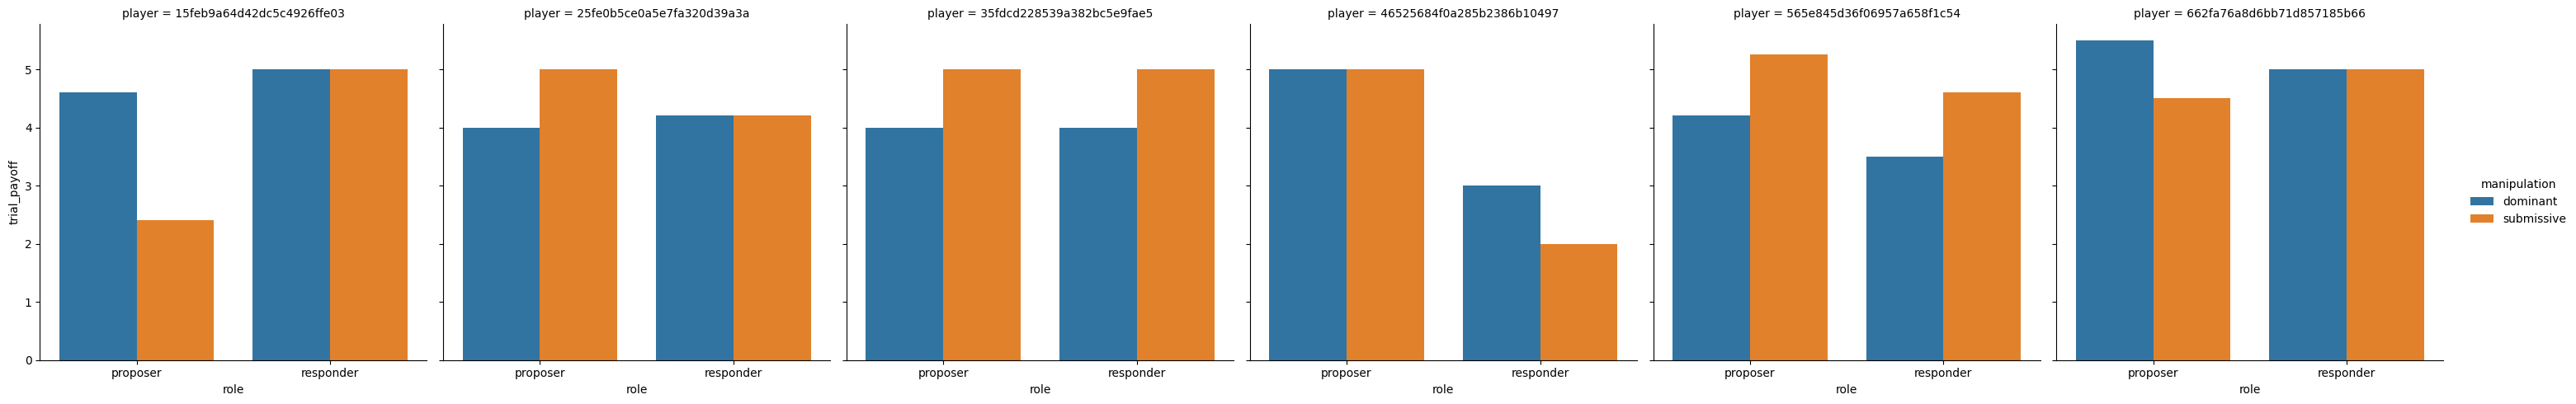

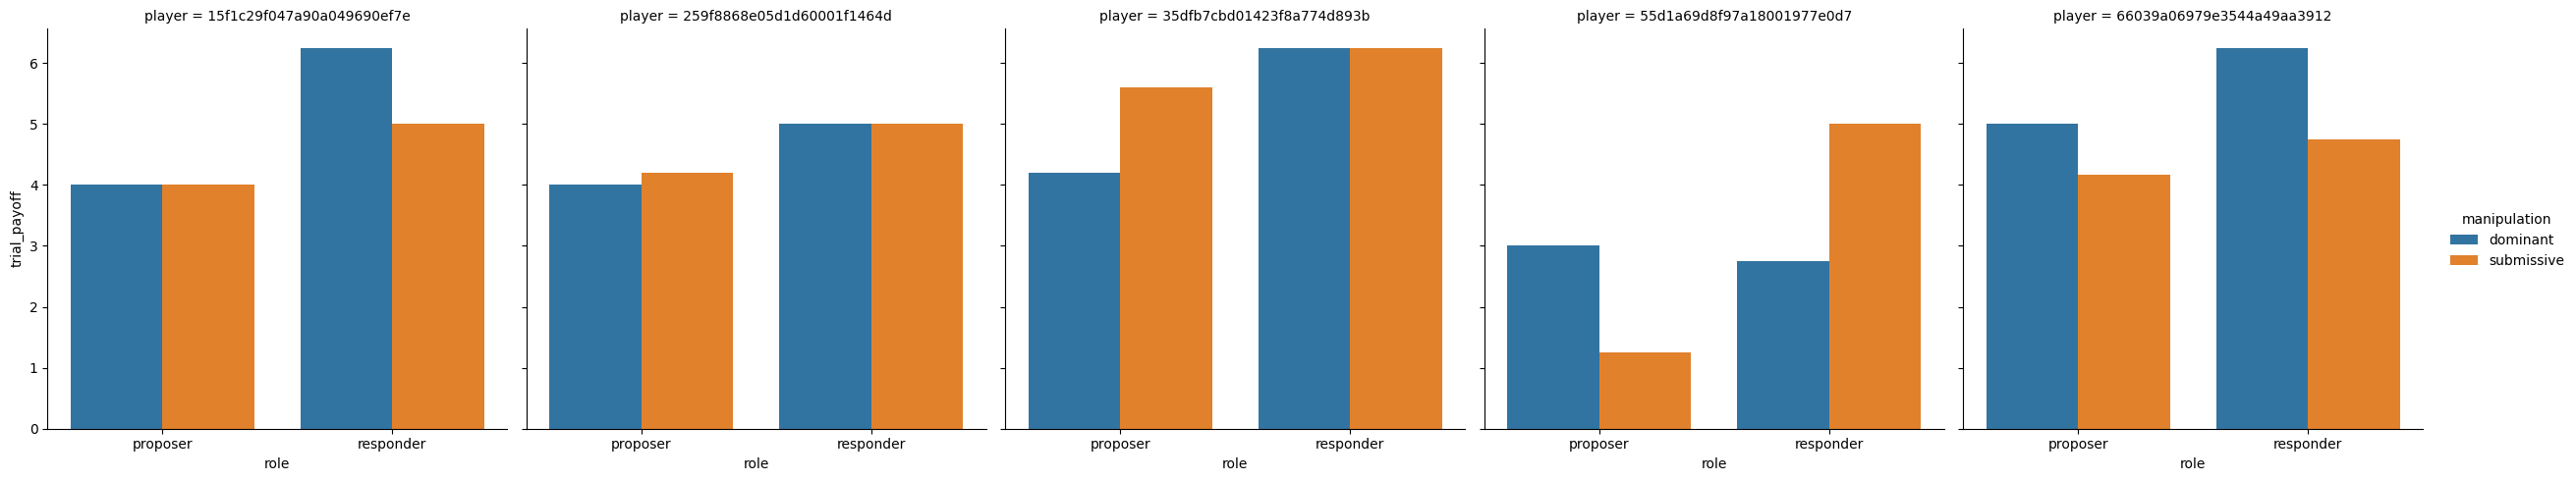

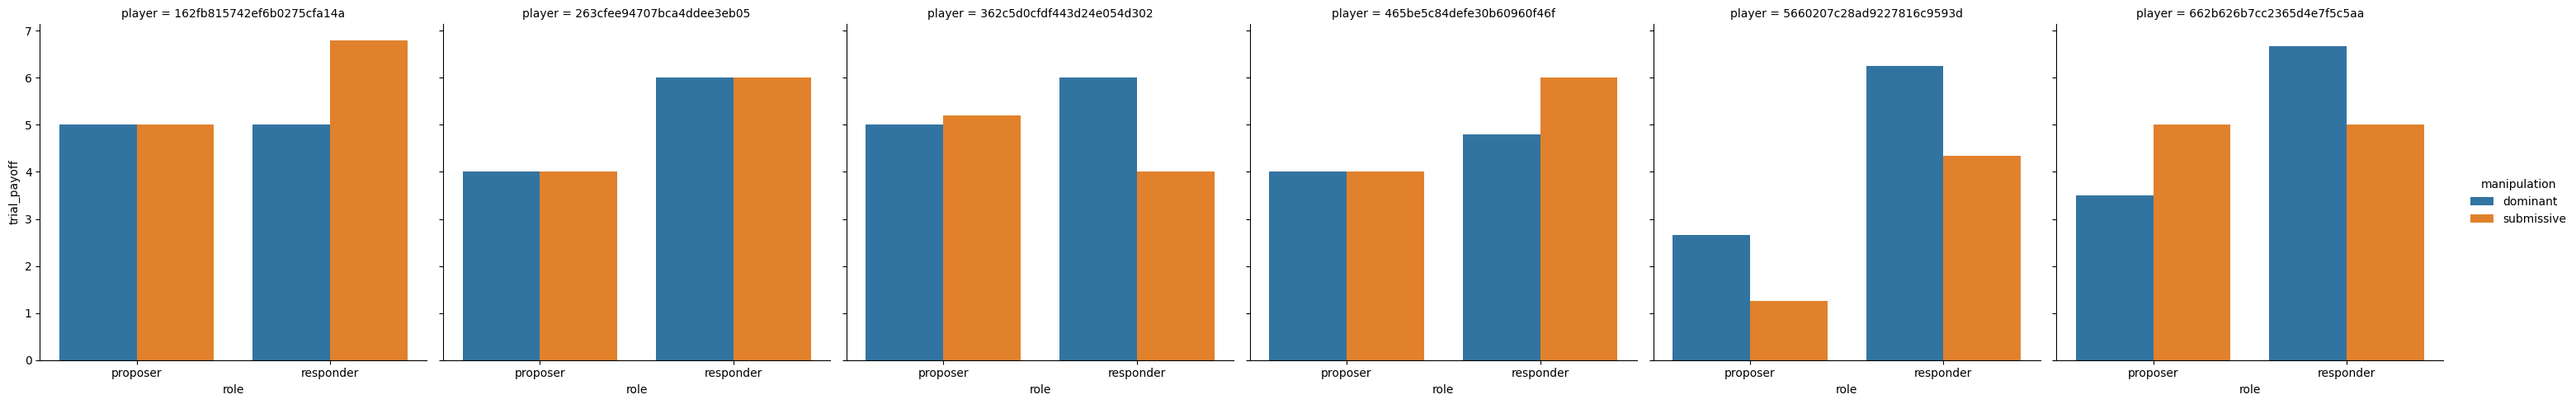

In [ ]:
df_analysis = df_mk1.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", col = "player", kind = "bar", data = df_analysis, dodge= True, capsize = .2)

df_analysis = df_mk2.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", col = "player", kind = "bar", data = df_analysis, dodge= True, capsize = .2)

df_analysis = df_mk3.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", col = "player", kind = "bar", data = df_analysis, dodge= True, capsize = .2)

df_analysis = df_mk4.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", col = "player", kind = "bar", data = df_analysis, dodge= True, capsize = .2)

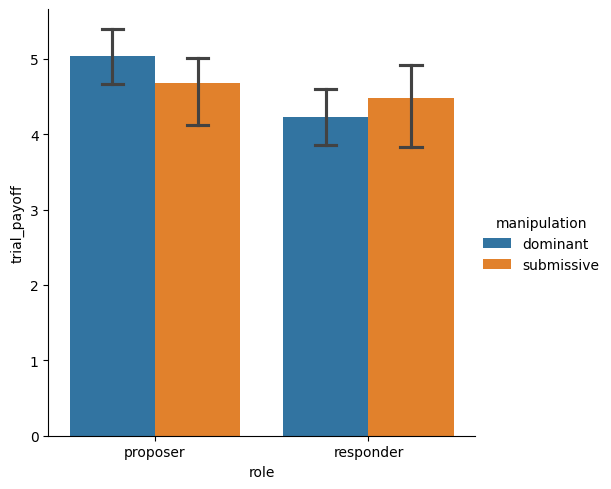

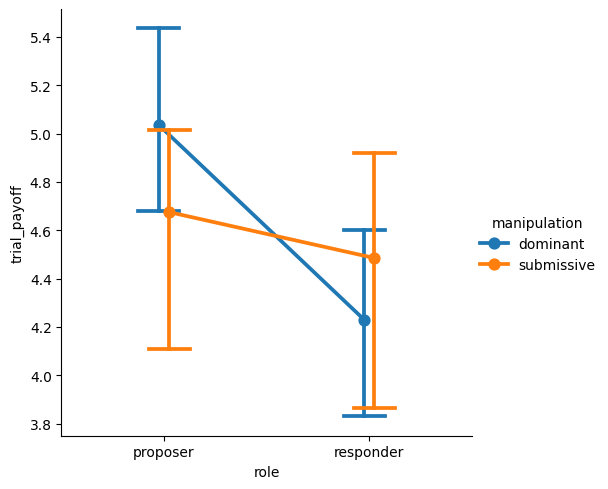

In [ ]:
#only sessions 1 and 2
df_responded_mk1_mk2 = pd.concat([df_mk1, df_m], ignore_index=True)
df_responded_mk1_mk2 = df_responded_mk1_mk2[df_responded_mk1_mk2['offer_response'].notna()]

df_analysis = df_responded_mk1_mk2.groupby(["player","role","manipulation"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", kind = "bar", data = df_analysis, dodge= True, capsize = .2)
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", kind = "point", data = df_analysis, dodge= True, capsize = .2)

### Sent Amount

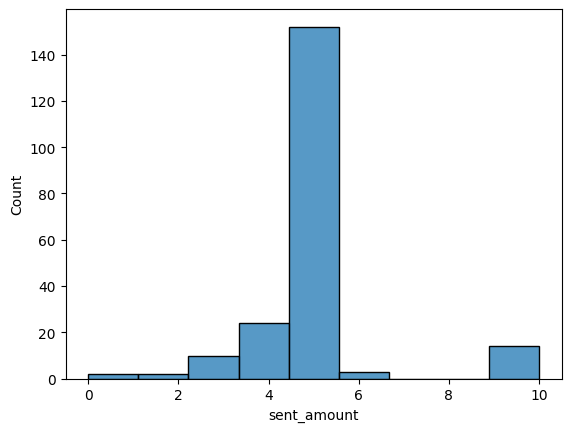

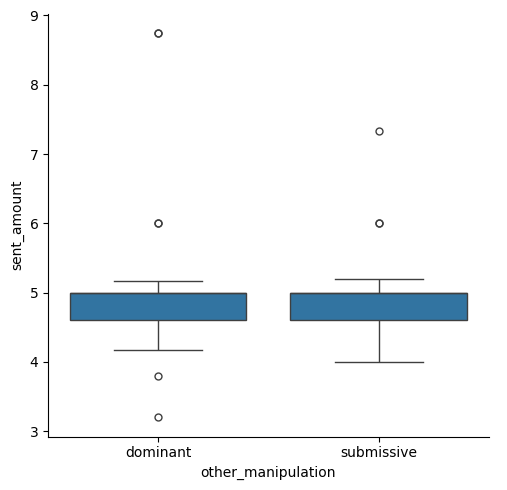

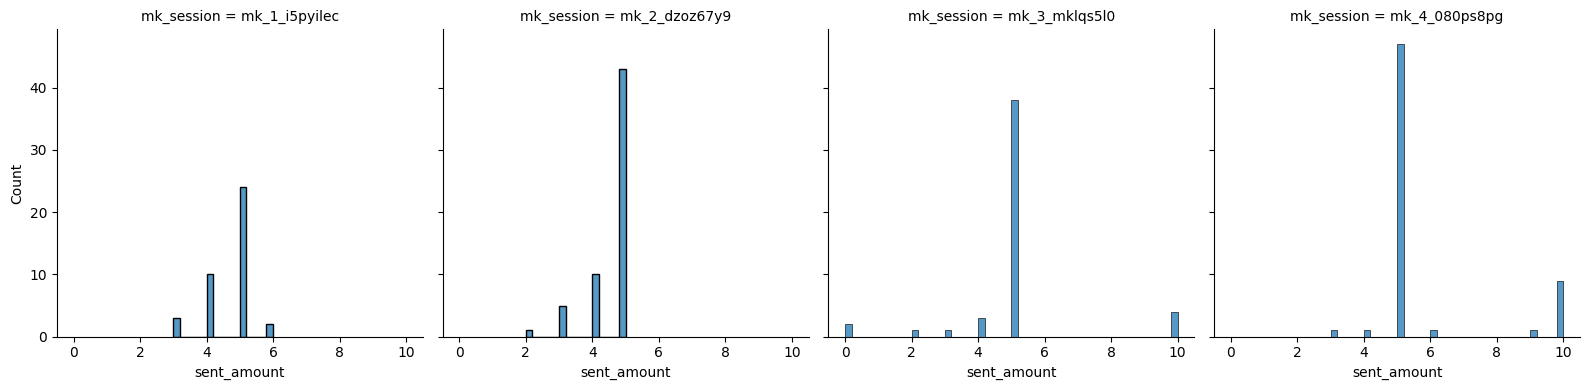

In [ ]:
df_responded_prop = combined_data.loc[combined_data["role"] == "proposer"]
sns.histplot(x = "sent_amount", data=df_responded_prop)

df_analysis = df_responded_prop.groupby(["player", "other_manipulation"])['sent_amount'].mean().reset_index()
sns.catplot(x = "other_manipulation", y = "sent_amount", data=df_analysis, kind="box")

g = sns.FacetGrid(df_responded_prop, col="mk_session", col_wrap=4, height=4)
g.map(sns.histplot, "sent_amount", binwidth=.2)

4.72680412371134
0.47268041237113406


C:\Users\DanielZander\AppData\Local\Temp\ipykernel_12392\2364624087.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sent_amount', y='percentage', data=percentages_df, palette=['black'])
C:\Users\DanielZander\AppData\Local\Temp\ipykernel_12392\2364624087.py:10: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='sent_amount', y='percentage', data=percentages_df, palette=['black'])


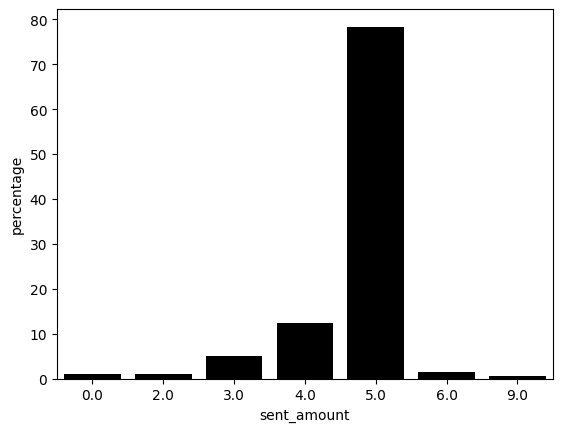

In [ ]:
df_responded_prop = df_responded_prop[df_responded_prop["sent_amount"] != 10]
counts = df_responded_prop['sent_amount'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Convert to a DataFrame for easier plotting
percentages_df = percentages.reset_index()
percentages_df.columns = ['sent_amount', 'percentage']
print(df_responded_prop["sent_amount"].mean()) #4.72
# Plot using Seaborn
sns.barplot(x='sent_amount', y='percentage', data=percentages_df, palette=['black'])

df_responded_prop["percentage"] = df_responded_prop["sent_amount"]/10
print(df_responded_prop["percentage"].mean()) #47%


### Reaction time

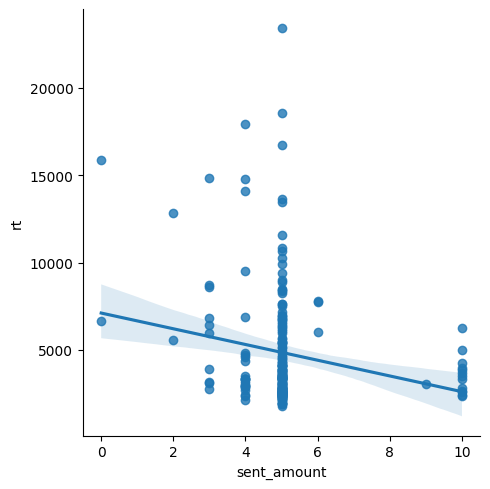

In [ ]:
sns.lmplot(x = "sent_amount", y = "rt", data=df_responded_prop )

<Axes: xlabel='rt', ylabel='Count'>

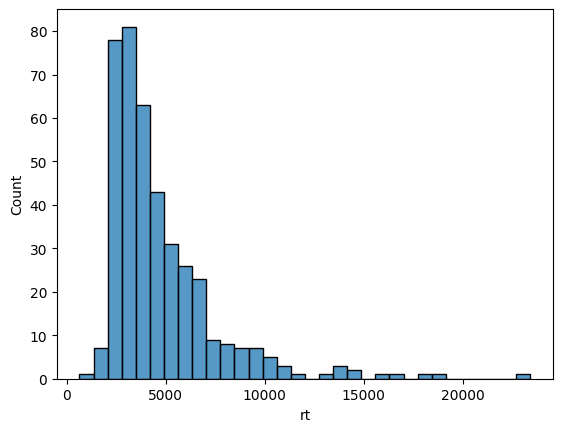

In [ ]:
sns.histplot(x = "rt", data=df_responded)

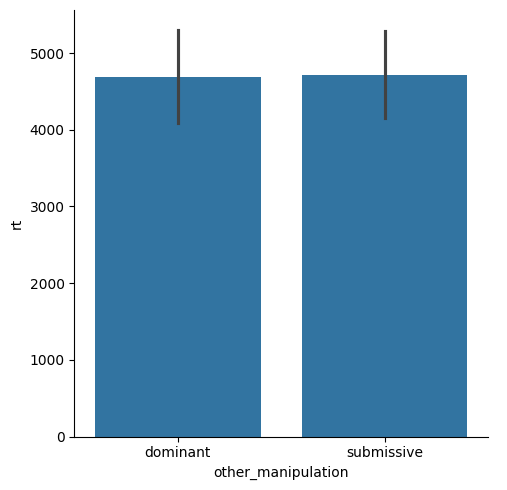

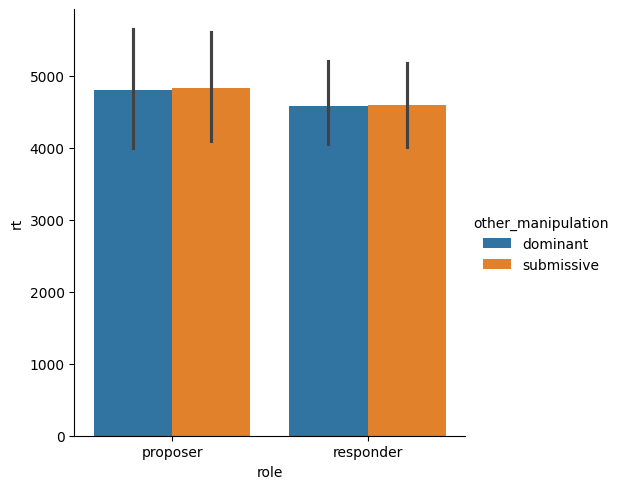

In [ ]:
df_analysis = df_responded.groupby(["player", "other_manipulation"])['rt'].mean().reset_index()
sns.catplot(x = "other_manipulation", y = "rt", kind = "bar", data = df_analysis)

df_analysis = df_responded.groupby(["player","role", "other_manipulation"])['rt'].mean().reset_index()
sns.catplot(x = "role", y = "rt", hue = "other_manipulation", kind = "bar", data = df_analysis)

## Social Measures

<Axes: xlabel='mean_social_dominance', ylabel='Count'>

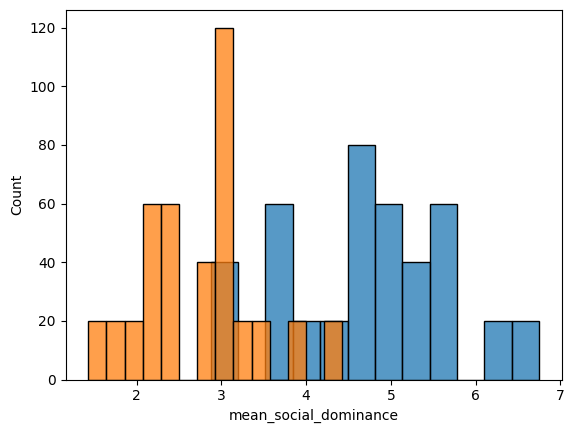

In [ ]:
sns.histplot(x = "mean_social_dominance", data=combined_data)
sns.histplot(x = "mean_aggresive_dominance", data=combined_data)

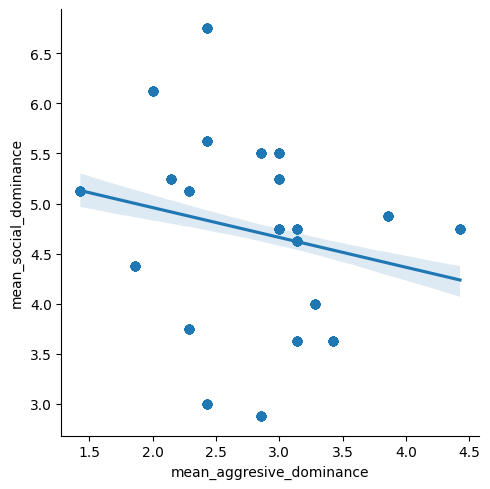

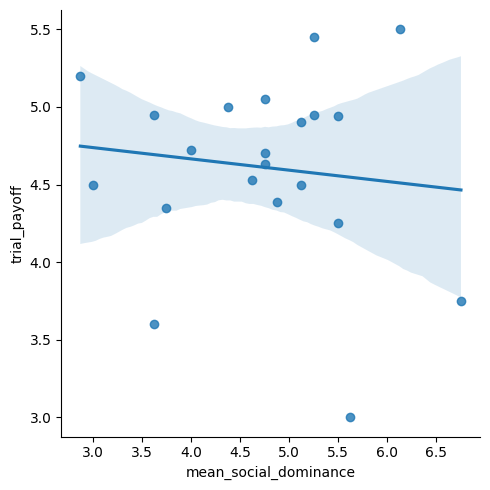

In [ ]:
sns.lmplot(x = "mean_aggresive_dominance", y= "mean_social_dominance", data=combined_data)


df_analysis = df_responded.groupby(["player"])['trial_payoff'].mean().reset_index()
df_social_measures = df_responded.groupby("player")["mean_social_dominance"].mean().reset_index()
df_analysis["mean_social_dominance"] = df_social_measures["mean_social_dominance"]
sns.lmplot(x = "mean_social_dominance", y= "trial_payoff", data=df_analysis)



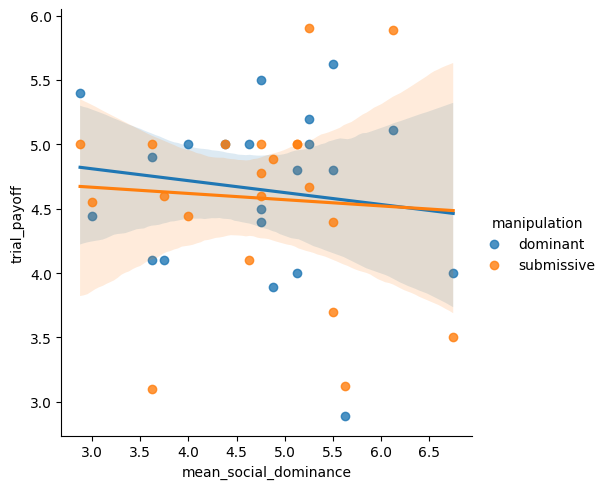

In [ ]:
df_analysis = df_responded.groupby(["player", "manipulation", "mean_social_dominance"])['trial_payoff'].mean().reset_index()
sns.lmplot(x = "mean_social_dominance", y= "trial_payoff", hue="manipulation", data=df_analysis)

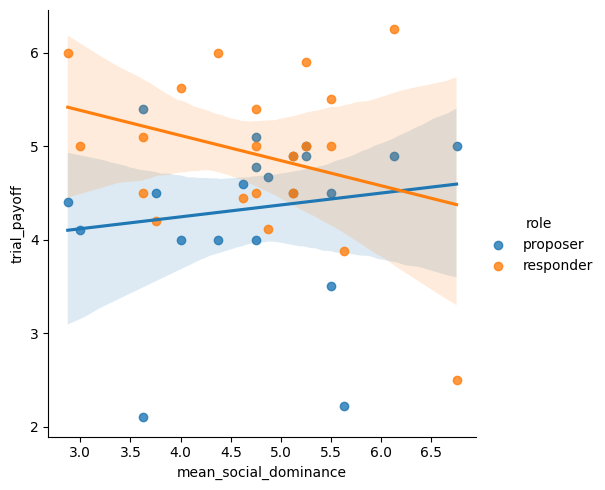

In [ ]:
df_analysis = df_responded.groupby(["player", "role", "mean_social_dominance"])['trial_payoff'].mean().reset_index()
sns.lmplot(x = "mean_social_dominance", y= "trial_payoff", hue="role", data=df_analysis)


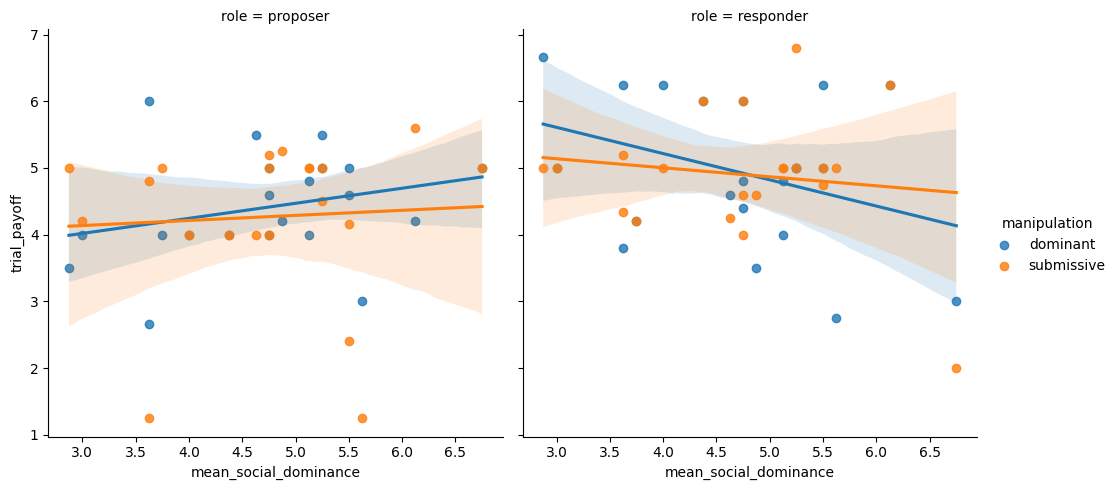

In [ ]:
df_analysis = df_responded.groupby(["player", "manipulation", "mean_social_dominance","role"])['trial_payoff'].mean().reset_index()
sns.lmplot(x = "mean_social_dominance", y= "trial_payoff", hue="manipulation", col="role", data=df_analysis)

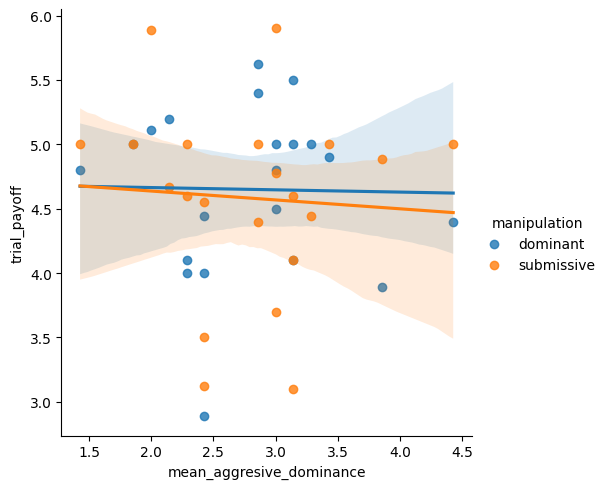

In [ ]:
df_analysis = df_responded.groupby(["player", "manipulation", "mean_aggresive_dominance"])['trial_payoff'].mean().reset_index()
sns.lmplot(x = "mean_aggresive_dominance", y= "trial_payoff", hue="manipulation", data=df_analysis)

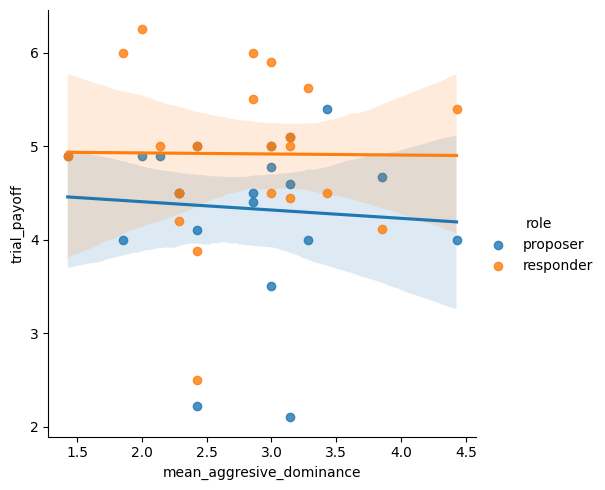

In [ ]:
df_analysis = df_responded.groupby(["player", "role", "mean_aggresive_dominance"])['trial_payoff'].mean().reset_index()
sns.lmplot(x = "mean_aggresive_dominance", y= "trial_payoff", hue="role", data=df_analysis)

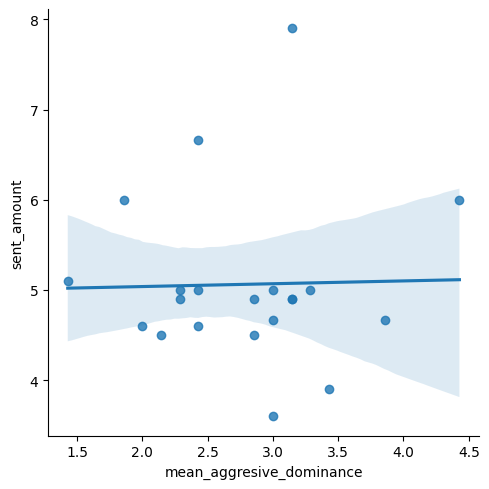

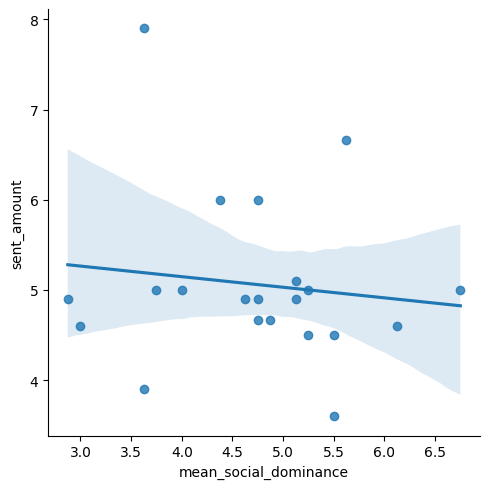

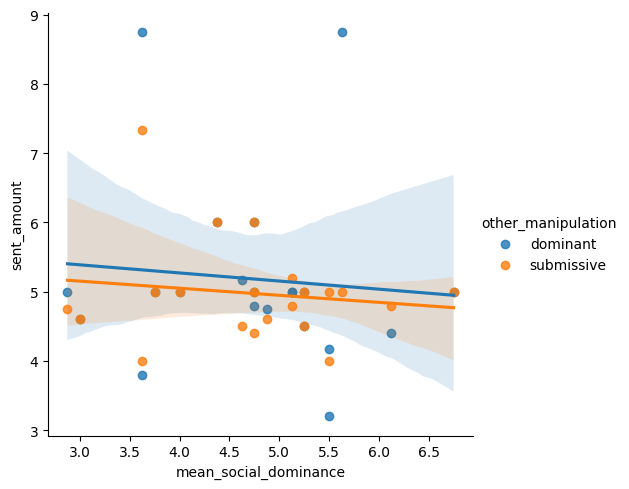

In [ ]:
df_analysis = df_responded_prop.groupby(["player", "mean_aggresive_dominance"])['sent_amount'].mean().reset_index()
sns.lmplot(x = "mean_aggresive_dominance", y = "sent_amount", data=df_analysis)

df_analysis = df_responded_prop.groupby(["player", "mean_social_dominance"])['sent_amount'].mean().reset_index()
sns.lmplot(x = "mean_social_dominance", y = "sent_amount", data=df_analysis)

df_analysis = df_responded_prop.groupby(["player", "mean_social_dominance", "other_manipulation"])['sent_amount'].mean().reset_index()
sns.lmplot(x = "mean_social_dominance", y = "sent_amount", hue = "other_manipulation", data=df_analysis)